### Project 1

# GLOBAL NATURAL DISASTERS - A 40+ YEAR ANALYSIS

---
### <strong>Analysts: Hossein Falsafi, Hieu Lam, Ryan James, and Dominique Spencer</strong>

---
### Import Dependencies and Setup

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
from pathlib import Path
from pprint import pprint
from citipy import citipy

# Import API key
#from api_keys import weather_api_key

### Load the EM-DAT Disaster CSV file 

In [2]:
csv_file = Path("Resources/1979-2023.csv")
disaster_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
disaster_data.head()

Dis No  Year   Seq Glide Disaster Group Disaster Subgroup  \
0  1979-0094-GTM  1979    94   NaN        Natural       Geophysical   
1  1979-0113-COL  1979   113   NaN        Natural       Geophysical   
2  1979-9200-HKG  1979  9200   NaN        Natural    Climatological   
3  1979-0185-AIA  1979   185   NaN        Natural    Meteorological   
4  1979-0039-ALB  1979    39   NaN        Natural       Geophysical   

  Disaster Type  Disaster Subtype Disaster Subsubtype Event Name  ...  \
0    Earthquake   Ground movement                 NaN        NaN  ...   
1    Earthquake   Ground movement                 NaN        NaN  ...   
2       Drought           Drought                 NaN        NaN  ...   
3         Storm  Tropical cyclone                 NaN   Frederic  ...   
4    Earthquake   Ground movement                 NaN        NaN  ...   

  Reconstruction Costs, Adjusted ('000 US$) Insured Damages ('000 US$)  \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                       NaN                        NaN   
3                                       NaN                        NaN   
4                                       NaN                        NaN   

  Insured Damages, Adjusted ('000 US$) Total Damages ('000 US$)  \
0                                  NaN                      NaN   
1                                  NaN                   8000.0   
2                                  NaN                      NaN   
3                                  NaN                      NaN   
4                                  NaN                      NaN   

  Total Damages, Adjusted ('000 US$)        CPI Adm Level Admin1 Code  \
0                                NaN  24.798841       NaN         NaN   
1                            32260.0  24.798841       NaN         NaN   
2                                NaN  24.798841       NaN         NaN   
3                                NaN  24.798841       NaN         NaN   
4                                NaN  24.798841       NaN         NaN   

  Admin2 Code Geo Locations  
0         NaN           NaN  
1         NaN           NaN  
2         NaN           NaN  
3         NaN           NaN  
4         NaN           NaN  

[5 rows x 50 columns]

----------------
### Clean EM-DAT Disaster dataset

<strong>The sections of code in this section are as follows:</strong>

1. Rename certain columns to enable .drop() function to work in step 2
2. Perform .drop() function on columns we don't need
3. Check for duplicates
4. Delete NaN values from Latitude, Longitude and Start Day columns
5. Convert Start Month and Start Day columns to integers
6. Remove 'N', 'S', 'E', 'W' characters from Latitudes and Longitudes
7. Print new DataFrame to reflect this code

In [3]:
# Rename columns containing USD to remove ' symbol as it interfers with the code
disaster_data = disaster_data.rename(columns={"Dis No": "Disaster Number", "AID Contribution ('000 US$)": "AID Contribution (,000 US$)", "Reconstruction Costs ('000 US$)": "Reconstruction Costs (,000 US$)",
                                             "Reconstruction Costs, Adjusted ('000 US$)": "Reconstruction Costs, Adjusted (,000 US$)", "Insured Damages ('000 US$)": "Insured Damages (,000 US$)",
                                             "Insured Damages, Adjusted ('000 US$)": "Insured Damages, Adjusted (,000 US$)", "Total Damages ('000 US$)": "Total Damages (,000 US$)",
                                             "Total Damages, Adjusted ('000 US$)": "Total Damages, Adjusted (,000 US$)"})

# Delete unwanted columns but maintain original copy
disaster_data = disaster_data.drop(columns=['Seq', 'Glide', 'Disaster Subtype', 'Disaster Subsubtype',
                                            'Event Name', 'Origin', 'Location', 'Associated Dis', 'Associated Dis2',
                                            'OFDA Response', 'Appeal', 'Declaration', 'AID Contribution (,000 US$)', 
                                            'Dis Mag Value', 'Dis Mag Scale', 'Local Time', 'River Basin', 'Start Year',
                                            'End Month', 'End Year', 'End Day', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
                                            'Reconstruction Costs (,000 US$)', 'Reconstruction Costs, Adjusted (,000 US$)',
                                            'Insured Damages (,000 US$)', 'Insured Damages, Adjusted (,000 US$)', 'Total Damages (,000 US$)',
                                            'Total Damages, Adjusted (,000 US$)', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code',
                                            'Geo Locations'], inplace=False)

# Check for duplicates
disaster_data['Disaster Number'].nunique() # there are none - needs double checking though!

disaster_data.to_csv("Resources/disasterdata.csv")

# Delete NaN values from Lat & Lon columns
filtered_disaster_df = disaster_data.dropna(subset=['Latitude', 'Longitude', 'Start Day']) # Returns 2277 rows out of 23252 rows

# Convert Start Month and Start Day columns to integers
filtered_disaster_df = filtered_disaster_df.astype({"Start Month": "int", "Start Day": "int"})

# Remove message warning for below because it's v distracting lol
pd.options.mode.chained_assignment=None

filtered_disaster_df['Latitude']=filtered_disaster_df['Latitude'].str.replace(r'[^0-9.]', '', regex=True)
filtered_disaster_df['Longitude']=filtered_disaster_df['Longitude'].str.replace(r'[^0-9.]', '',regex=True)
filtered_disaster_df['Latitude'] = filtered_disaster_df['Latitude'].str.replace(r'^(\d+\.\d+).*', r'\1')
filtered_disaster_df['Longitude'] = filtered_disaster_df['Longitude'].str.replace(r'^(\d+\.\d+).*', r'\1')

# Display new DataFrame
filtered_disaster_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_1988\1182801812.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_disaster_df['Latitude'] = filtered_disaster_df['Latitude'].str.replace(r'^(\d+\.\d+).*', r'\1')
C:\Users\admin\AppData\Local\Temp\ipykernel_1988\1182801812.py:35: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_disaster_df['Longitude'] = filtered_disaster_df['Longitude'].str.replace(r'^(\d+\.\d+).*', r'\1')


Disaster Number  Year Disaster Group Disaster Subgroup Disaster Type  \
0    1979-0094-GTM  1979        Natural       Geophysical    Earthquake   
1    1979-0113-COL  1979        Natural       Geophysical    Earthquake   
4    1979-0039-ALB  1979        Natural       Geophysical    Earthquake   
22   1979-0063-CHN  1979        Natural       Geophysical    Earthquake   
23   1979-0082-CHN  1979        Natural       Geophysical    Earthquake   

      Country  ISO           Region Continent Latitude Longitude  Start Month  \
0   Guatemala  GTM  Central America  Americas   14.321    90.082           10   
1    Colombia  COL    South America  Americas    1.598    79.358           12   
4     Albania  ALB  Southern Europe    Europe   42.096    19.209            4   
22      China  CHN     Eastern Asia      Asia   31.452   119.241            7   
23      China  CHN     Eastern Asia      Asia   41.145   108.129            8   

    Start Day  Total Deaths  
0           9           NaN  
1          12         579.0  
4          15          35.0  
22          9          42.0  
23         25           NaN

----------------
### Code to create parameteres that comply with API request requirements

<strong>The sections of code in this section are as follows:</strong>

1. Import relevent dependencies
2. Create new columns for Full Date and Unix Timestamp conversions
3. Code to populate Full Date column (based off data that exists in our DataFrame)
4. Code to convert Full Date values to Unix Timestamps, then populate new Unix Timestamp column
5. Display new DataFrame to reflect these changes

In [4]:
import time
import datetime

filtered_disaster_df['Full Date'] = ""
filtered_disaster_df['Unix Timestamp'] = ""

for index, row in filtered_disaster_df.iterrows():
    date = f"{row['Start Day']}/{row['Start Month']}/{row['Year']}"
    filtered_disaster_df.loc[index,'Full Date'] = date

for index, row in filtered_disaster_df.iterrows():
    full_date = f"{row['Full Date']}"
    unix = (datetime.datetime.strptime(full_date, "%d/%m/%Y").timestamp())
    filtered_disaster_df.loc[index,'Unix Timestamp'] = unix

filtered_disaster_df.head()

Disaster Number  Year Disaster Group Disaster Subgroup Disaster Type  \
0    1979-0094-GTM  1979        Natural       Geophysical    Earthquake   
1    1979-0113-COL  1979        Natural       Geophysical    Earthquake   
4    1979-0039-ALB  1979        Natural       Geophysical    Earthquake   
22   1979-0063-CHN  1979        Natural       Geophysical    Earthquake   
23   1979-0082-CHN  1979        Natural       Geophysical    Earthquake   

      Country  ISO           Region Continent Latitude Longitude  Start Month  \
0   Guatemala  GTM  Central America  Americas   14.321    90.082           10   
1    Colombia  COL    South America  Americas    1.598    79.358           12   
4     Albania  ALB  Southern Europe    Europe   42.096    19.209            4   
22      China  CHN     Eastern Asia      Asia   31.452   119.241            7   
23      China  CHN     Eastern Asia      Asia   41.145   108.129            8   

    Start Day  Total Deaths   Full Date Unix Timestamp  
0           9           NaN   9/10/1979    308246400.0  
1          12         579.0  12/12/1979    313776000.0  
4          15          35.0   15/4/1979    292953600.0  
22          9          42.0    9/7/1979    300297600.0  
23         25           NaN   25/8/1979    304358400.0

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names
cities = []
latitudes = []
longitudes = []
cities = []
disaster_types = []
disaster_subgroups = []
disaster_groups = []

# Create a set of random lat and lng combinations

lats=pd.to_numeric(filtered_disaster_df['Latitude'])
lngs=pd.to_numeric(filtered_disaster_df['Longitude'])
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # if city not in cities:
    cities.append(city)
    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 2277


### Use the OpenWeatherMap API to retrieve coordinate temperature data

In [6]:
# # Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
# main_data = []
# units = "metric"

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Limit the loop to the first 200 pairs of city and desired_timestamp
# filtered_disaster_df1 = filtered_disaster_df.iloc[:2277].reset_index(drop=True)
# # Loop through all the cities in our list to fetch weather data
# for i, (city, desired_timestamp) in enumerate(zip(cities, filtered_disaster_df1['Unix Timestamp'])):
    
#     # Create endpoint URL with each city
#     city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}&dt={desired_timestamp}"

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         response = requests.get(city_url)
#         city_weather = response.json()
        
#         # Parse out latitude, longitude, max temp, country, and date
#         main_lat = city_weather['coord']['lat']
#         main_lng = city_weather['coord']['lon']
#         main_max_temp = city_weather['main']['temp_max']
#         main_country = city_weather['sys']['country']
#         main_date = city_weather['dt']
        
#         # Append the City information into city_data list
#         main_data.append({"Year": filtered_disaster_df1.loc[i,'Year'],
#                           "Full Date": filtered_disaster_df1.loc[i,'Full Date'],
#                           "Date": main_date,
#                           "Start Month":filtered_disaster_df1.loc[i,'Start Month'],
#                           "City": city, 
#                           "Country": main_country,
#                           "Lat": main_lat, 
#                           "Lng": main_lng, 
#                           "Max Temp": main_max_temp,
#                           "Disaster Group": filtered_disaster_df1.loc[i,'Disaster Group'],
#                           "Disaster Subgroup": filtered_disaster_df1.loc[i,'Disaster Subgroup'],
#                           "Disaster Type": filtered_disaster_df1.loc[i,'Disaster Type'],
#                           "Region": filtered_disaster_df1.loc[i,'Region'],
#                           "Continent": filtered_disaster_df1.loc[i,'Continent'],
#                           "Total Deaths": filtered_disaster_df1.loc[i,'Total Deaths']                                                    
#                           })

#     # If an error is experienced, skip the city and Temp add a placeholder value
#     except:
#         main_data.append({"Year": filtered_disaster_df1.loc[i,'Year'],
#                           "Full Date": filtered_disaster_df1.loc[i,'Full Date'],
#                           "Date": filtered_disaster_df1.loc[i,'Unix Timestamp'],
#                           "Start Month":filtered_disaster_df1.loc[i,'Start Month'],
#                           "City": "N/A", 
#                           "Country": filtered_disaster_df1.loc[i,'Country'],
#                           "Lat": filtered_disaster_df1.loc[i,'Latitude'], 
#                           "Lng": filtered_disaster_df1.loc[i,'Longitude'], 
#                           "Max Temp": "N/A",
#                           "Disaster Group": filtered_disaster_df1.loc[i,'Disaster Group'],
#                           "Disaster Subgroup": filtered_disaster_df1.loc[i,'Disaster Subgroup'],
#                           "Disaster Type": filtered_disaster_df1.loc[i,'Disaster Type'],
#                           "Region": filtered_disaster_df1.loc[i,'Region'],
#                           "Continent": filtered_disaster_df1.loc[i,'Continent'],
#                           "Total Deaths": filtered_disaster_df1.loc[i,'Total Deaths']                                                    
#                           })
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [7]:
# #Convert main data into a Pandas DataFrame
# main_data_df=pd.DataFrame(main_data)
# # Display sample data
# main_data_df = main_data_df[main_data_df['Max Temp'] != 'N/A']
# main_data_df.sort_values(by='Year', ascending=True, inplace=True)
# main_data_df

In [8]:
# # Export the Main_Data into a csv
# main_data_df.to_csv("Resources/maindata.csv")

In [9]:
# #Convert main data int a Pandas DataFrame
# main_data_df=pd.DataFrame(main_data)
# # Display sample data
# main_data_df = main_data_df[main_data_df['Max Temp'] != 'N/A']
# main_data_df.sort_values(by='Year', ascending=True, inplace=True)
# main_data_df

In [10]:
# # Export the Main_Data into a csv
# main_data_df.to_csv("Resources/maindata.csv")

# # Display sample data
# main_data_df

In [11]:
# Read new csv file into notebook
csv_file = Path("Resources/maindata.csv")
main_data_df = pd.read_csv(csv_file)
main_data_df.head()

Unnamed: 0  Year   Full Date        Date  Start Month         City Country  \
0           0  1979   9/10/1979  1693825717           10  bamboo flat      IN   
1          54  1979  12/09/1979  1693825735            9    manokwari      ID   
2          65  1979  14/03/1979  1693825738            3         loei      TH   
3         139  1979  24/05/1979  1693825764            5        budva      ME   
4        2214  1979  18/07/1979  1693826430            7    dursunbey      TR   

       Lat       Lng  Max Temp Disaster Group Disaster Subgroup Disaster Type  \
0  11.7000   92.7167     28.05        Natural       Geophysical    Earthquake   
1  -0.8667  134.0833     26.02        Natural       Geophysical    Earthquake   
2  17.4167  101.5000     21.87        Natural       Geophysical    Earthquake   
3  42.2864   18.8400     26.97        Natural       Geophysical    Earthquake   
4  39.5860   28.6257     27.30        Natural       Geophysical    Earthquake   

               Region Continent  Total Deaths  
0     Central America  Americas           NaN  
1  South-Eastern Asia      Asia           2.0  
2     Central America  Americas           5.0  
3     Southern Europe    Europe           NaN  
4        Western Asia      Asia           NaN

### Load the GISS Temperature CSV file 

In [12]:
csv_file = Path("Resources/global_historical_temps.csv")
temp_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
temp_data.head()

Year   Jan   Feb   Mar   Apr   May   Jun   Jul    Aug    Sep    Oct    Nov  \
0  1880 -0.18 -0.25 -0.09 -0.16 -0.10 -0.21 -0.18   -0.1  -0.15  -0.24  -0.22   
1  1881 -0.20 -0.14  0.03  0.05  0.06 -0.19  0.00  -0.04  -0.15  -0.22  -0.19   
2  1882  0.16  0.14  0.04 -0.17 -0.15 -0.23 -0.17  -0.07  -0.15  -0.24  -0.17   
3  1883 -0.29 -0.37 -0.12 -0.18 -0.18 -0.08 -0.07  -0.14  -0.22  -0.11  -0.23   
4  1884 -0.13 -0.08 -0.36 -0.40 -0.34 -0.36 -0.30  -0.28  -0.27  -0.25  -0.34   

     Dec    J-D    D-N    DJF   MAM    JJA    SON  
0  -0.18  -0.17    ***    *** -0.12  -0.17   -0.2  
1  -0.07  -0.09   -0.1  -0.17  0.04  -0.08  -0.19  
2  -0.36  -0.11  -0.09   0.07 -0.09  -0.16  -0.18  
3  -0.11  -0.18   -0.2  -0.34 -0.16   -0.1  -0.19  
4  -0.31  -0.29  -0.27  -0.11 -0.37  -0.31  -0.29

----------------
### Clean GISS Temperature dataset

<strong>The sections of code in this section are as follows:</strong>

1. Rename certain columnsfor readability
2. Delete rows of years we don't need
3. Print new DataFrame to reflect this code

In [13]:
# Rename columns containing USD to remove ' symbol as it interfers with the code
temp_data = temp_data.rename(columns={"J-D": "Year Average", "DJF": "Dec/Jan/Feb (Summer)", "MAM": "Mar/Apr/May (Autumn)",
                                             "JJA": "Jun/Jul/Aug (Winter)", "SON": "Sep/Oct/Nov (Spring)"})

# Delete unwanted columns but maintain original copy
temp_data = temp_data.drop(columns=['D-N'], inplace=False)

unwanted_temp_data = temp_data[(temp_data['Year'] < 1979) | (temp_data['Year'] > 2022)]
temp_data = temp_data.drop(unwanted_temp_data.index, axis=0)

temp_data = temp_data.astype({"Aug": "float", "Sep": "float", "Oct": "float", "Nov": "float", "Dec": "float",
                             "Year Average": "float", "Dec/Jan/Feb (Summer)": "float", "Jun/Jul/Aug (Winter)": "float", "Sep/Oct/Nov (Spring)": "float", })
#temp_data = temp_data.set_index('Year')
temp_data.head()

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
99   1979  0.09 -0.10  0.19  0.15  0.04  0.14  0.04  0.17  0.25  0.26  0.28   
100  1980  0.30  0.39  0.30  0.30  0.35  0.21  0.22  0.19  0.21  0.13  0.30   
101  1981  0.53  0.42  0.48  0.32  0.25  0.29  0.32  0.35  0.15  0.12  0.23   
102  1982  0.05  0.15  0.03  0.15  0.18  0.06  0.15  0.04  0.14  0.13  0.18   
103  1983  0.53  0.43  0.42  0.28  0.34  0.23  0.18  0.36  0.37  0.17  0.30   

      Dec  Year Average  Dec/Jan/Feb (Summer)  Mar/Apr/May (Autumn)  \
99   0.48          0.17                  0.02                  0.13   
100  0.22          0.26                  0.39                  0.32   
101  0.41          0.32                  0.39                  0.35   
102  0.43          0.14                  0.20                  0.12   
103  0.17          0.31                  0.46                  0.34   

     Jun/Jul/Aug (Winter)  Sep/Oct/Nov (Spring)  
99                   0.11                  0.27  
100                  0.20                  0.21  
101                  0.32                  0.17  
102                  0.08                  0.15  
103                  0.26                  0.28

### Load original EM-DAT Disaster Data to clean then merge with GISS Temp dataframe

In [14]:
csv_file = Path("Resources/disasterdata.csv")
disaster_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
unwanted_disaster_data = disaster_data[(disaster_data['Year'] > 2022)]
disaster_data = disaster_data.drop(unwanted_disaster_data.index, axis=0)

disaster_data = disaster_data.drop(columns=['Unnamed: 0', 'Disaster Subgroup', 'ISO', 'Continent', 'Latitude', 'Longitude', 'Start Day', 'Total Deaths'])
disaster_data = disaster_data[~disaster_data['Disaster Type'].isin(['Animal accident', 'Complex Disasters', 'Extreme temperature', 'Glacial lake outburst',
                                                                    'Impact', 'Industrial accident', 'Insect infestation', 'Mass movement (dry)',
                                                                    'Miscellaneous accident', 'Transport accident'])]

merged_disaster_df = pd.merge(temp_data, disaster_data, how='inner', on=('Year'))
merged_disaster_df.dropna().head()

Year   Jan  Feb   Mar   Apr   May   Jun   Jul   Aug   Sep  ...  \
0  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
1  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
2  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
3  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   
4  1979  0.09 -0.1  0.19  0.15  0.04  0.14  0.04  0.17  0.25  ...   

   Dec/Jan/Feb (Summer)  Mar/Apr/May (Autumn)  Jun/Jul/Aug (Winter)  \
0                  0.02                  0.13                  0.11   
1                  0.02                  0.13                  0.11   
2                  0.02                  0.13                  0.11   
3                  0.02                  0.13                  0.11   
4                  0.02                  0.13                  0.11   

   Sep/Oct/Nov (Spring)  Disaster Number  Disaster Group  Disaster Type  \
0                  0.27    1979-0094-GTM         Natural     Earthquake   
1                  0.27    1979-0113-COL         Natural     Earthquake   
2                  0.27    1979-9200-HKG         Natural        Drought   
3                  0.27    1979-0185-AIA         Natural          Storm   
4                  0.27    1979-0039-ALB         Natural     Earthquake   

     Country           Region Start Month  
0  Guatemala  Central America        10.0  
1   Colombia    South America        12.0  
2  Hong Kong     Eastern Asia        10.0  
3   Anguilla        Caribbean         9.0  
4    Albania  Southern Europe         4.0  

[5 rows x 24 columns]

# ANALYSIS QUESTIONS

---
## 1.	What is the influence of geographic coordinates on the frequency of natural disasters?

---
### Create Disaster interactive map

### HOSSEIN CODE HERE

---

Count number of natural disasters relating to different coordinates (aka Lat & Lon from OpenWeather API)

Barchart that includes regions, number of disasters (cities too messy as so many)

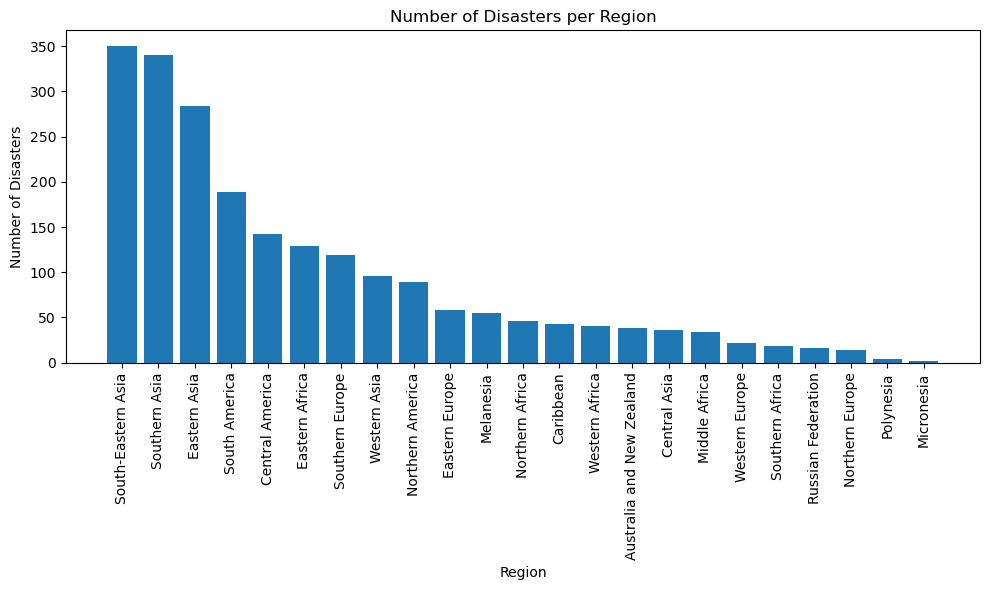

In [15]:
# Group the data by 'Region' and count the number of disasters in each city
disaster_counts = main_data_df['Region'].value_counts()
#disaster_counts = disaster_counts.sort_index(ascending=True)

#Create a bar chart
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.bar(disaster_counts.index, disaster_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters per Region')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

#Save the plot
plt.savefig("Resources/bar-Disasters_per_Region.png")

# Show the plot
plt.tight_layout()
plt.show()

Linechart that includes regions, average temperature

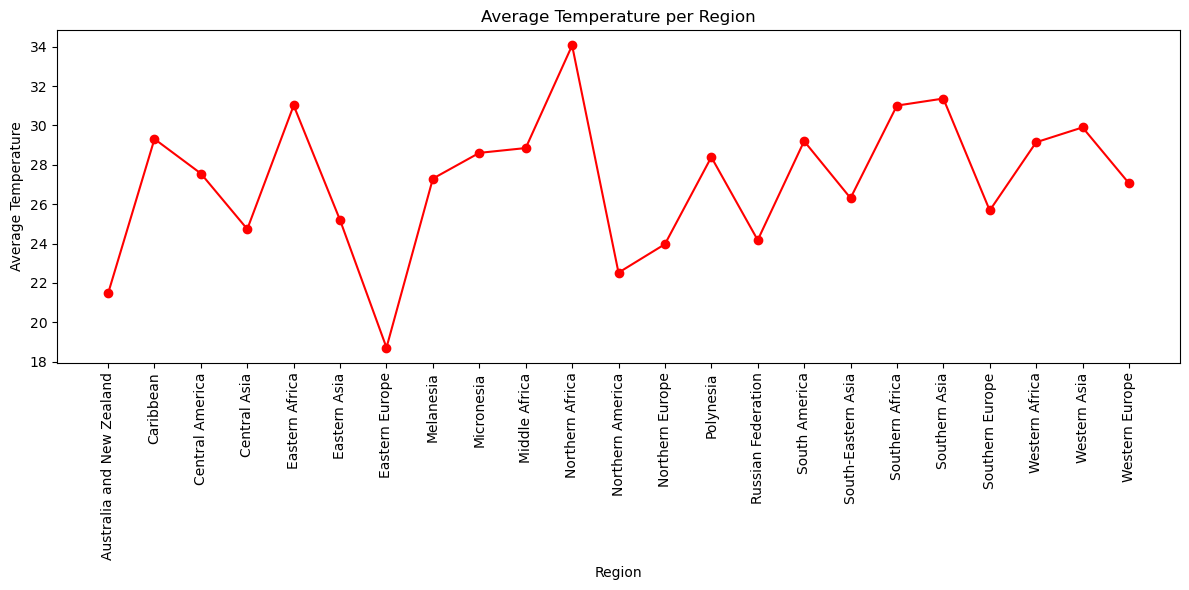

In [16]:
temperature_counts = main_data_df.groupby(['Region'])['Max Temp'].mean().sort_values(ascending=False)
temperature_counts = temperature_counts.sort_index(ascending=True)

plt.figure(figsize=(12, 6))
plt.plot(temperature_counts, marker='o', linestyle='-', color = 'r')

# plt.figure(figsize=(10,6))  # Adjust the figure size as needed
# plt.plot(temperature_counts.index, temperature_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.title('Average Temperature per Region')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

#Save the plot
plt.savefig("Resources/line_Temp_per_Region.png")

# Show the plot
plt.tight_layout()
plt.show()

Combine the two charts!

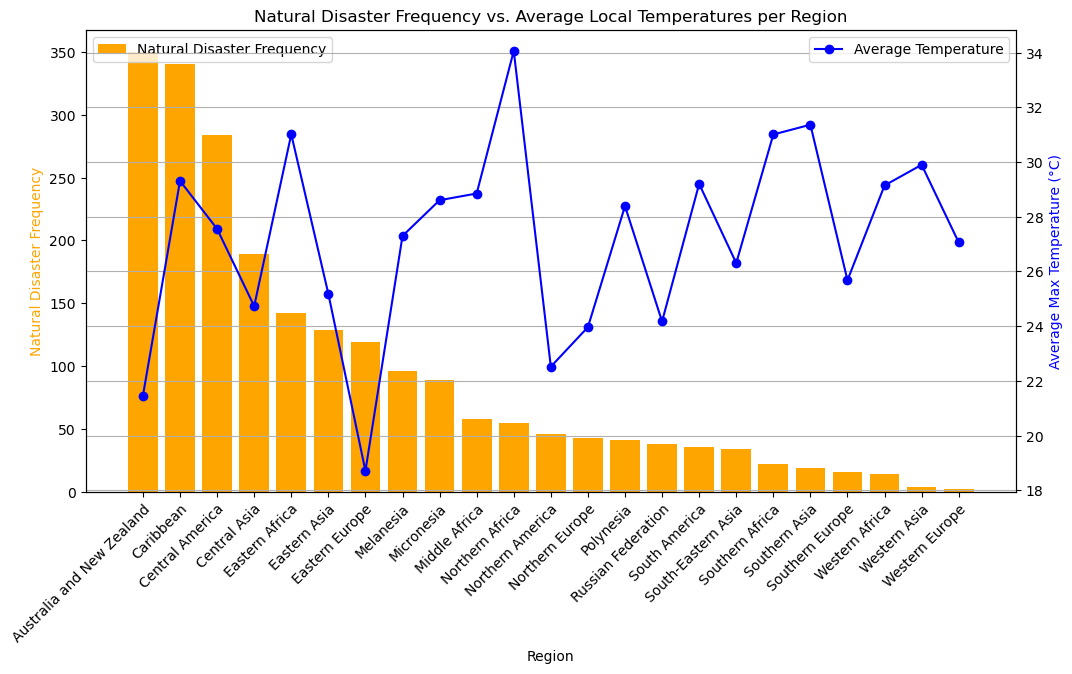

In [17]:
# Create a figure and the first subplot (Natural Disaster Frequency)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Natural Disaster Frequency data on the first subplot
ax1.bar(disaster_counts.index, disaster_counts.values, color='orange')
ax1.set_xlabel('Region')
ax1.set_ylabel('Natural Disaster Frequency', color='orange')
ax1.set_title('Natural Disaster Frequency vs. Average Local Temperatures per Region')

# Create a second subplot that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Temperatures data on the second subplot
ax2.plot(temperature_counts.index, temperature_counts.values, marker='o', linestyle='-', color='blue')
ax2.set_ylabel('Average Max Temperature (°C)', color='blue')

# Add a legend for each subplot
ax1.legend(['Natural Disaster Frequency'], loc='upper left')
ax2.legend(['Average Temperature'], loc='upper right')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=90)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#Save the plot
plt.savefig("Resources/combinedDisastervsTemp.png")

# Show the plot
plt.grid(True)
# plt.tight_layout()
plt.show()

---
## 2.	Does the Northern or Southern Hemisphere experience greater or fewer natural disasters?

In [18]:
# Filter by Northern Hemisphere 

northern_hemi_df=main_data_df[main_data_df['Lat'] >= 0]
ndisaster_counts = northern_hemi_df['Region'].value_counts().sort_values(ascending=True)
northern_hemi_df.head()

Unnamed: 0  Year   Full Date        Date  Start Month         City Country  \
0           0  1979   9/10/1979  1693825717           10  bamboo flat      IN   
2          65  1979  14/03/1979  1693825738            3         loei      TH   
3         139  1979  24/05/1979  1693825764            5        budva      ME   
4        2214  1979  18/07/1979  1693826430            7    dursunbey      TR   
5         138  1979  15/04/1979  1693825718            4          bar      UA   

       Lat       Lng  Max Temp Disaster Group Disaster Subgroup Disaster Type  \
0  11.7000   92.7167     28.05        Natural       Geophysical    Earthquake   
2  17.4167  101.5000     21.87        Natural       Geophysical    Earthquake   
3  42.2864   18.8400     26.97        Natural       Geophysical    Earthquake   
4  39.5860   28.6257     27.30        Natural       Geophysical    Earthquake   
5  49.0772   27.6826     14.42        Natural       Geophysical    Earthquake   

            Region Continent  Total Deaths  
0  Central America  Americas           NaN  
2  Central America  Americas           5.0  
3  Southern Europe    Europe           NaN  
4     Western Asia      Asia           NaN  
5  Southern Europe    Europe         121.0

In [19]:
# Filter by Southern Hemisphere 

sorthern_hemi_df=main_data_df[main_data_df['Lat'] <0]
sdisaster_counts = sorthern_hemi_df['Region'].value_counts().sort_values(ascending=True)
sorthern_hemi_df.head()

Unnamed: 0  Year   Full Date        Date  Start Month       City Country  \
1            54  1979  12/09/1979  1693825735            9  manokwari      ID   
64         2248  1983  25/10/1983  1693826440           10       palu      ID   
119         120  1986  24/06/1986  1693825757            6   jayapura      ID   
192         239  1990   7/06/1990  1693825795            6   lorengau      PG   
271         275  1992  14/10/1992  1693825807           10   lorengau      PG   

        Lat       Lng  Max Temp Disaster Group Disaster Subgroup  \
1   -0.8667  134.0833     26.02        Natural       Geophysical   
64  -0.8917  119.8707     25.13        Natural       Geophysical   
119 -2.5333  140.7000     27.66        Natural       Geophysical   
192 -2.0226  147.2712     26.93        Natural       Geophysical   
271 -2.0226  147.2712     26.93        Natural       Geophysical   

         Disaster Type              Region Continent  Total Deaths  
1           Earthquake  South-Eastern Asia      Asia           2.0  
64          Earthquake  South-Eastern Asia      Asia           2.0  
119         Earthquake           Melanesia   Oceania           NaN  
192         Earthquake           Melanesia   Oceania           NaN  
271  Volcanic activity           Melanesia   Oceania           NaN

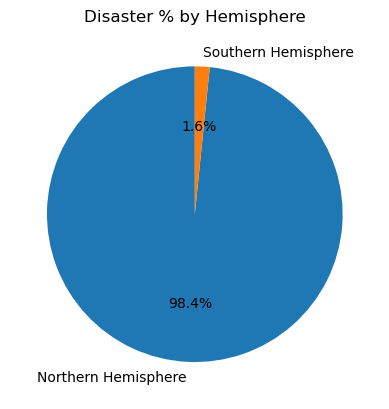

In [20]:
# Combine both counts into a single DataFrame
combined_counts = pd.DataFrame({'Northern Hemisphere': ndisaster_counts, 'Southern Hemisphere': sdisaster_counts})

# Create a pie chart
# plt.figure(figsize=(8, 8))
plt.pie(combined_counts.sum(), labels=combined_counts.columns, autopct='%1.1f%%', startangle=90)
plt.title('Disaster % by Hemisphere')

#Save the plot
plt.savefig("Resources/Hemisphere_Pie.png")

# Show the pie chart
plt.show()

---
## 3.	What is the correlation between natural disaster frequency and average temperatures over time?

#### First Analysis:

##### EM-DAT and OpenWeather API Dataframe

Combined line chart representing two things:
1. Natural Disaster Frequency vs. Time 
2. Average Temperatures vs. Time 

Scatterplot combining these, including regression line to demonstrate correlation

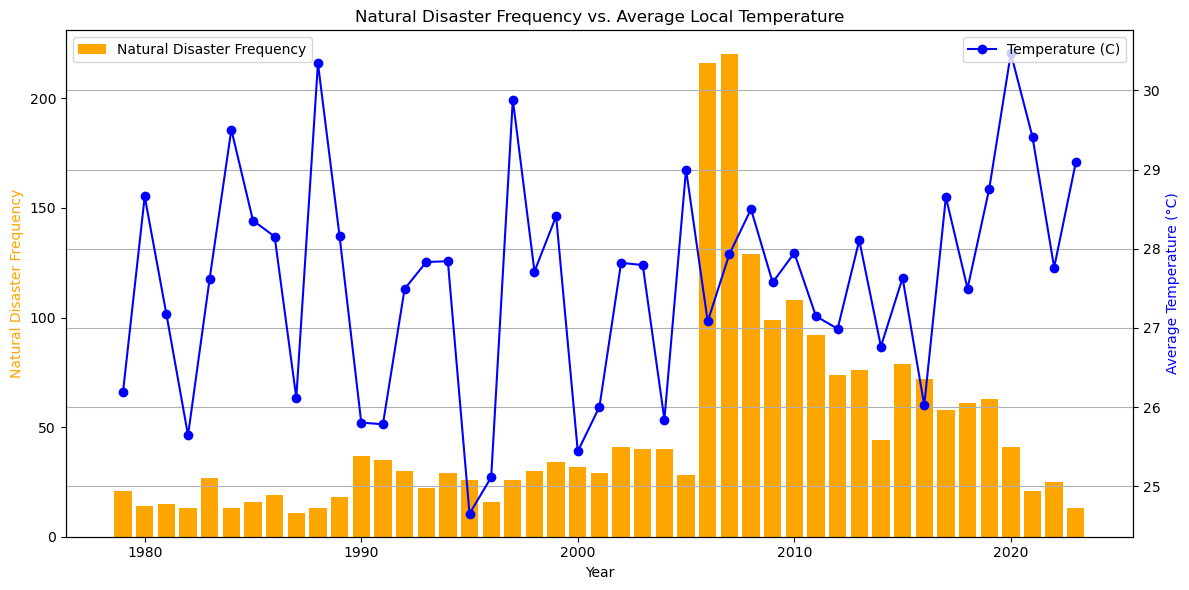

In [21]:
# Calculate the total disaster frequency for each date and region
disaster_counts = main_data_df.groupby(main_data_df['Year'])['Disaster Group'].count()

avg_temp_data = main_data_df.groupby(main_data_df['Year'])['Max Temp'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Natural Disaster Frequency data on the first subplot
ax1.bar(disaster_counts.index, disaster_counts.values, color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Natural Disaster Frequency', color='orange')
ax1.set_title('Natural Disaster Frequency vs. Average Local Temperature')

# Create a second subplot that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Temperatures data on the second subplot
ax2.plot(avg_temp_data.index, avg_temp_data.values, marker='o', linestyle='-', color='blue')
ax2.set_ylabel('Average Temperature (°C)', color='blue')

# Add a legend for each subplot
ax1.legend(['Natural Disaster Frequency'], loc='upper left')
ax2.legend(['Temperature (C)'], loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Save the plot
plt.savefig("Resources/combined_APItemp_Disasterfrequency.png")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The r-value is -0.0


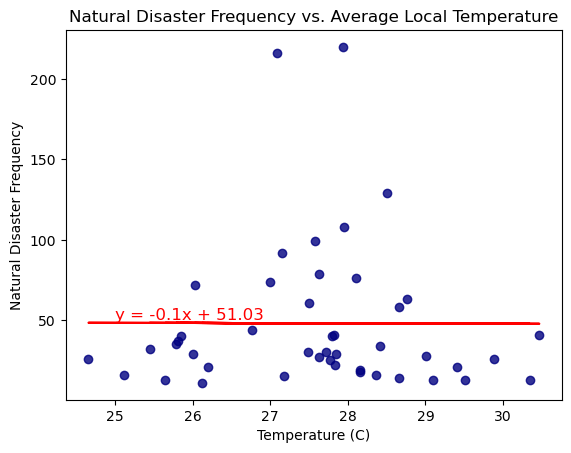

In [22]:
# Correlation with regression line

avg_temp_data = main_data_df.groupby(main_data_df['Year'])['Max Temp'].mean()
disaster_counts = main_data_df.groupby(main_data_df['Year'])['Disaster Group'].count()
plt.scatter(avg_temp_data, disaster_counts, marker='o', color='navy', alpha=0.8)
x_values = avg_temp_data
y_values =  disaster_counts
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties
plt.xlabel('Temperature (C)')
plt.ylabel('Natural Disaster Frequency')
plt.title('Natural Disaster Frequency vs. Average Local Temperature')
print(f"The r-value is {round(rvalue,2)}")

#Save the plot
plt.savefig("Resources/correlation_APItemp_Disasterfrequency.png")

# Show plot
plt.annotate(line_eq, (25, 50), fontsize=12, color='red')
plt.show()

#### Second Analysis:

##### EM-DAT and GISS Temperature Dataframe

Combined line chart representing two things:
1. Natural Disaster Frequency vs. Time 
2. Average Temperatures vs. Time 

Scatterplot combining these, including regression line to demonstrate correlation

C:\Users\admin\AppData\Local\Temp\ipykernel_1988\4238651087.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = merged_disaster_df.groupby(['Year']).mean()['Year Average']


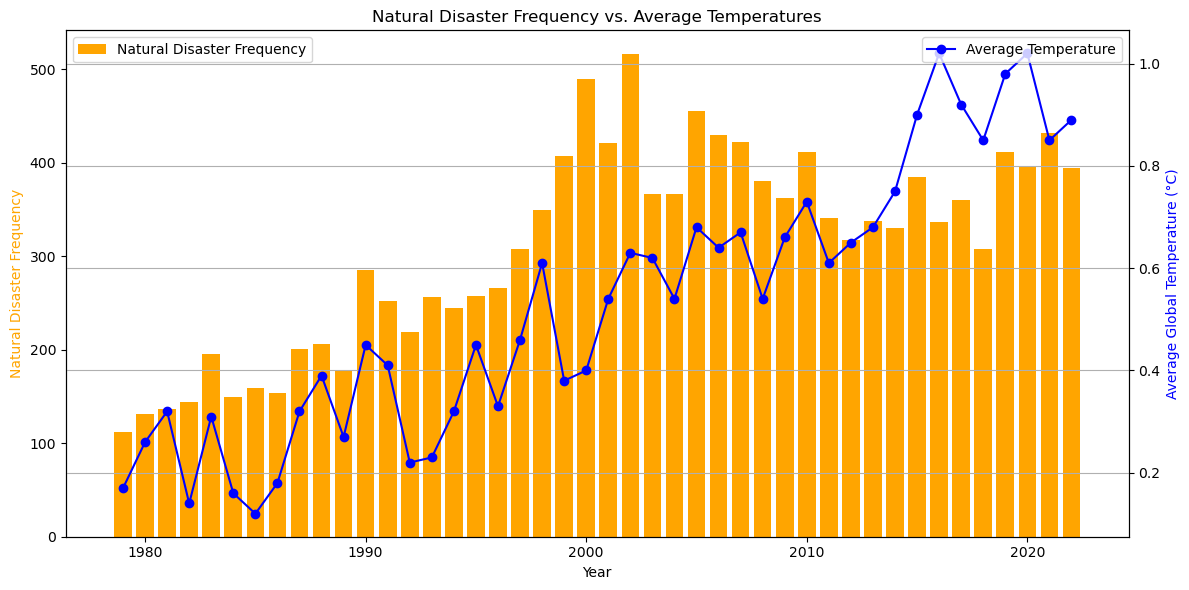

In [23]:
# Calculate the total disaster frequency for each date and region
no_disasters = merged_disaster_df.groupby(['Year']).count()['Disaster Number']
average_temp = merged_disaster_df.groupby(['Year']).mean()['Year Average']

# Create variables to use for plotting
disaster_plot_data = no_disasters
temp_plot_data = average_temp

# Create a figure and the first subplot (Natural Disaster Frequency)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Natural Disaster Frequency data on the first subplot
ax1.bar(disaster_plot_data.index, disaster_plot_data.values, color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Natural Disaster Frequency', color='orange')
ax1.set_title('Natural Disaster Frequency vs. Average Temperatures')

# Create a second subplot that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Temperatures data on the second subplot
ax2.plot(temp_plot_data.index, temp_plot_data.values, marker='o', linestyle='-', color='blue')
ax2.set_ylabel('Average Global Temperature (°C)', color='blue')

# Add a legend for each subplot
ax1.legend(['Natural Disaster Frequency'], loc='upper left')
ax2.legend(['Average Temperature'], loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Save the plot
plt.savefig("Resources/combined_GISStemp_Disasterfrequency.png")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The r-value is 0.73


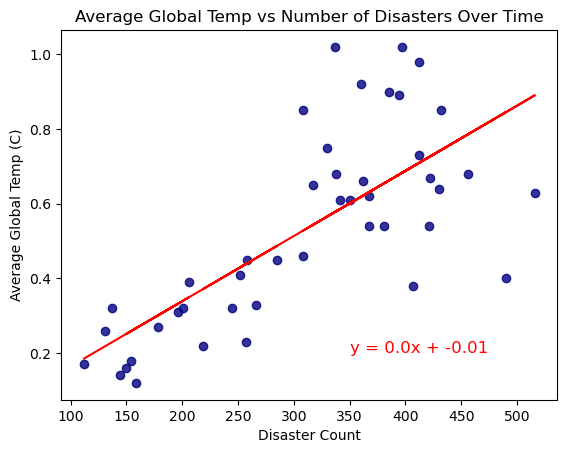

In [24]:
# Correlation with regression line

plt.scatter(no_disasters, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_disasters
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Disaster Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Disasters Over Time')
print(f"The r-value is {round(rvalue,2)}")

#Save the plot
plt.savefig("Resources/correlation_GISStemp_Disasterfrequency.png")

# Show plot
plt.annotate(line_eq, (350, 0.2), fontsize=12, color='red')
plt.show()

---
## 4.	What category of disaster is more likely to occur during specific seasons?

Grouped Barchart to show this (one colour for each season)

Number of disaster types within certain month range (eg: Dec-Feb for 'summer', Mar-May for 'Autumn' etc)

In [25]:
# Pull data for each season

# Summer
summer_df = merged_disaster_df[(merged_disaster_df['Start Month'] < 3.0) | (merged_disaster_df['Start Month'] > 11.0)]
disaster_types = summer_df.groupby(['Disaster Type']).count()
summer_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)

# Autumn
autumn_df = merged_disaster_df[(merged_disaster_df['Start Month'] < 6.0) & (merged_disaster_df['Start Month'] > 2.0)]
disaster_types = autumn_df.groupby(['Disaster Type']).count()
autumn_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)

# Winter
winter_df = merged_disaster_df[(merged_disaster_df['Start Month'] < 9) & (merged_disaster_df['Start Month'] > 5)]
disaster_types = winter_df.groupby(['Disaster Type']).count()
winter_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)

# Spring
spring_df = merged_disaster_df[(merged_disaster_df['Start Month'] < 12) & (merged_disaster_df['Start Month'] > 9)]
disaster_types = spring_df.groupby(['Disaster Type']).count()
spring_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)

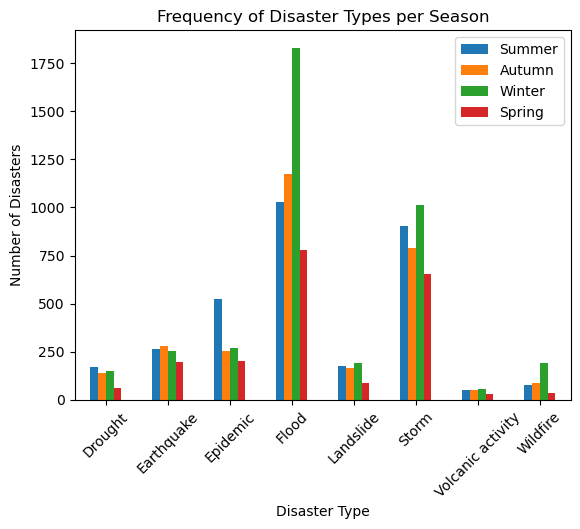

<Figure size 2000x1000 with 0 Axes>

In [26]:
# plot grouped bar chart
season_df = pd.DataFrame({'Summer': summer_disasters, 'Autumn': autumn_disasters,
                   'Winter': winter_disasters,'Spring': spring_disasters,})

ax = season_df.plot.bar(rot=0)
plt.xticks(rotation=45)
plt.title("Frequency of Disaster Types per Season")
plt.xlabel("Disaster Type")
plt.ylabel("Number of Disasters")
plt.legend(['Summer', 'Autumn', 'Winter', 'Spring'])
plt.figure(figsize=(20,10))

#Save the plot
plt.savefig("Resources/bar_Seasons_grouped.png")

plt.show()

---
## 5.	Are there global hotspots for specific disaster categories?

Based off four most commonly occuring Disasters
1. Floods
2. Storms
3. Earthquakes
4. Epidemics

Pie chart per disaster type

In [27]:
# Create dataframe for region hotspots
region_hotspots = merged_disaster_df.groupby(['Region', 'Disaster Type']).size().reset_index(name='Count')
region_hotspots.head()

Region Disaster Type  Count
0  Australia and New Zealand       Drought      8
1  Australia and New Zealand    Earthquake      8
2  Australia and New Zealand      Epidemic      3
3  Australia and New Zealand         Flood     97
4  Australia and New Zealand     Landslide      3

##### Flood Hotspots

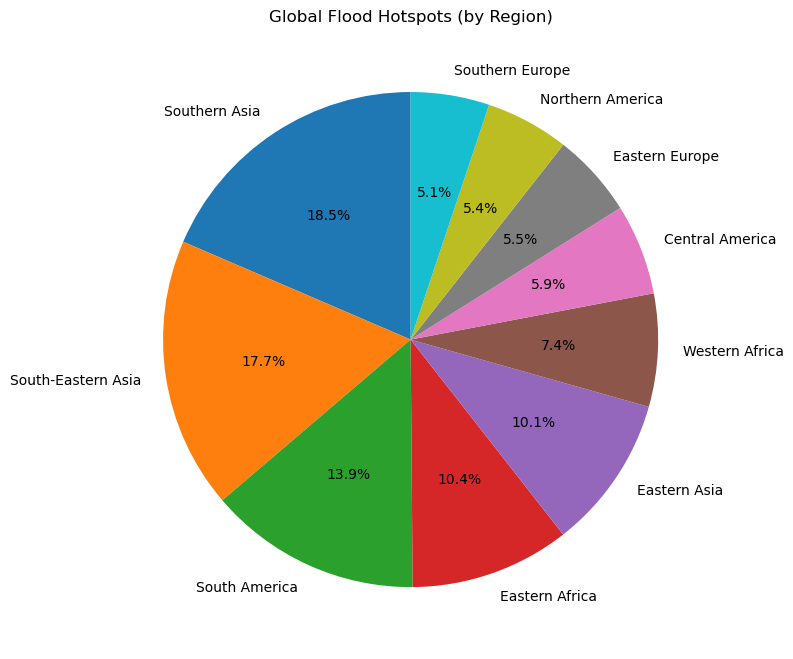

In [28]:
flood_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Flood')]
flood_hotspots = flood_hotspots.sort_values(by='Count', ascending=False).head(11)

#Top 10 countries with the highest Flood numbers
flood_top_10 = flood_hotspots[(flood_hotspots['Count'] > 200)]

data = {
    'Region': flood_top_10['Region'],
    'Number of Disasters': flood_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Flood Hotspots (by Region)')

# Save the plot
plt.savefig("Resources/pie_Flood_hotspots.png")

# Show the pie chart
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

##### Storm Hotspots

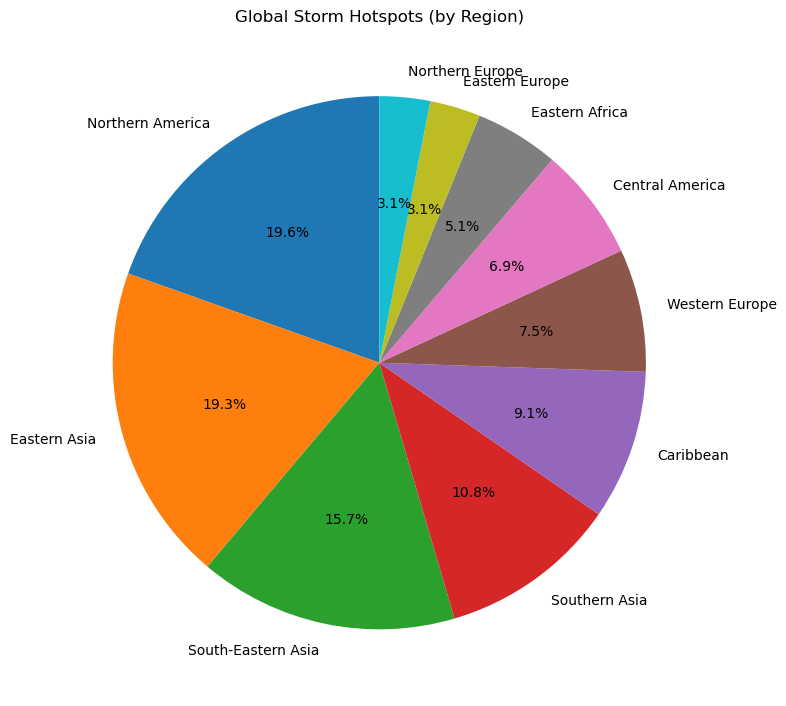

In [29]:
storm_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Storm')]
storm_hotspots = storm_hotspots.sort_values(by='Count', ascending=False).head(11)

# Top 10 countries with the highest Flood numbers
storm_top_10 = storm_hotspots[(storm_hotspots['Count'] > 99)]

data = {
    'Region': storm_top_10['Region'],
    'Number of Disasters': storm_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Storm Hotspots (by Region)')

# Save the plot
plt.savefig("Resources/pie_Storm_hotspots.png")

# Show the pie chart
plt.tight_layout()
plt.show()

##### Earthquake Hotspots

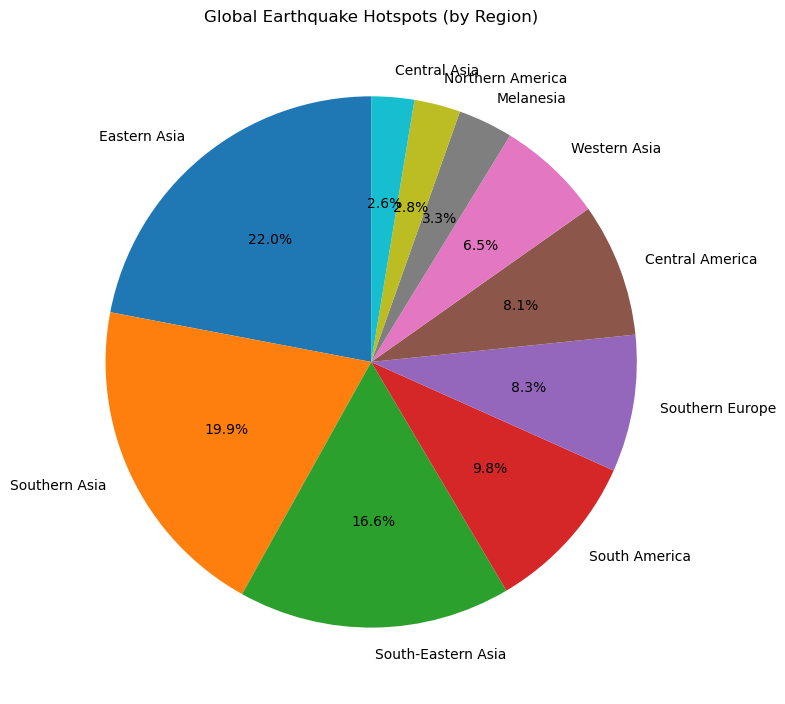

In [30]:
earthquake_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Earthquake')]
earthquake_hotspots = earthquake_hotspots.sort_values(by='Count', ascending=False).head(11)

# Top 10 countries with the highest Flood numbers
earthquake_top_10 = earthquake_hotspots[(earthquake_hotspots['Count'] > 24)]

data = {
    'Region': earthquake_top_10['Region'],
    'Number of Disasters': earthquake_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Earthquake Hotspots (by Region)')

# Save the plot
plt.savefig("Resources/pie_Earthquake_hotspots.png")

# Show the pie chart
plt.tight_layout()
plt.show()

##### Epidemic Hotspots

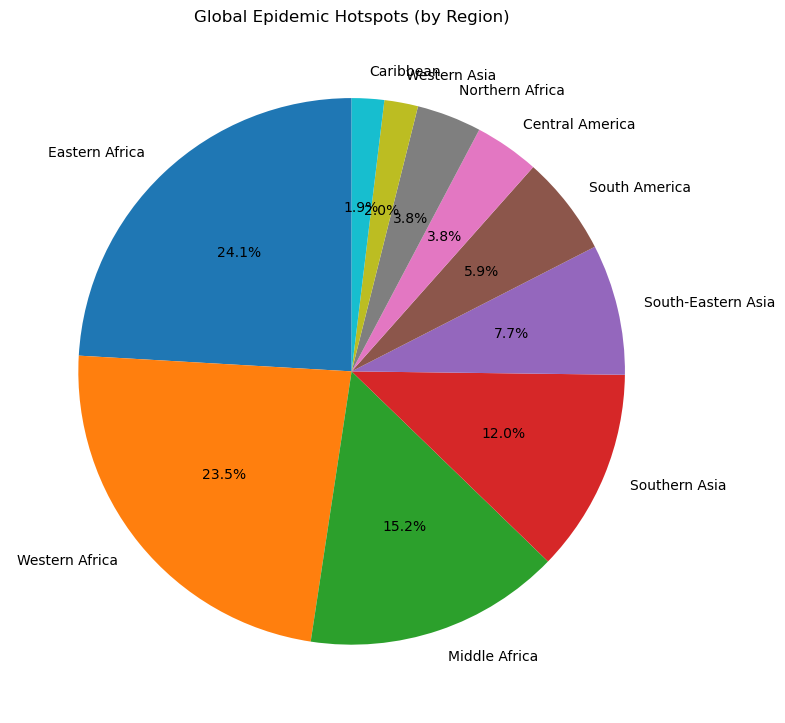

In [31]:
epidemic_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Epidemic')]
epidemic_hotspots = epidemic_hotspots.sort_values(by='Count', ascending=False).head(11)

# Top 10 countries with the highest Flood numbers
epidemic_top_10 = epidemic_hotspots[(epidemic_hotspots['Count'] > 23)]

data = {
    'Region': epidemic_top_10['Region'],
    'Number of Disasters': epidemic_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Epidemic Hotspots (by Region)')

# Save the plot
plt.savefig("Resources/pie_Epidemic_hotspots.png")

# Show the pie chart
plt.tight_layout()

plt.show()

---
## 6.	Are there any noticeable trends in different types of disasters (e.g., hurricanes, earthquakes, wildfires) over time?

Count number of natural disasters per year, and create a line chart & stacked barchart to represent findings

In [32]:
# Group data by year and disaster type, and count the number of disasters for each type in each year
disaster_counts = disaster_data.groupby(['Year', 'Disaster Type']).size().reset_index(name='Count')

# Create a DataFrame to store the total number of disasters per year
total_disasters = disaster_counts.groupby('Year')['Count'].sum().reset_index()

# Merge the total_disasters DataFrame with the original disaster_counts DataFrame
merged_df = pd.merge(disaster_counts, total_disasters, on='Year', suffixes=('', '_Total'))

# Rename columns for clarity
merged_df = merged_df.rename(columns={'Count_Total': 'Total_Disasters'})

# Display the DataFrame
merged_df.head()

Year Disaster Type  Count  Total_Disasters
0  1979       Drought     11              112
1  1979    Earthquake     22              112
2  1979      Epidemic      3              112
3  1979         Flood     34              112
4  1979     Landslide      7              112

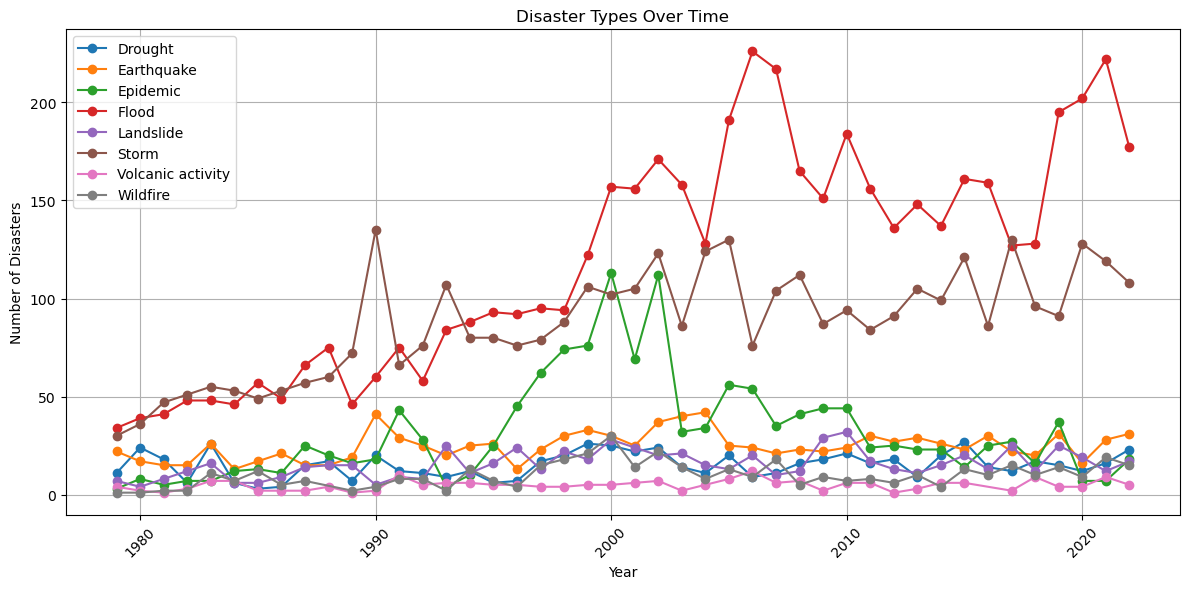

In [33]:
# Create a line chart with multiple lines
plt.figure(figsize=(12, 6))

# Create lines for each disaster type
for disaster_type in merged_df['Disaster Type'].unique():
    subset = merged_df[merged_df['Disaster Type'] == disaster_type]
    plt.plot(subset['Year'], subset['Count'], marker='o', label=disaster_type)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Disaster Types Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

#Save the plot
plt.savefig("Resources/disasterTypeOverTime.png")

# Show the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

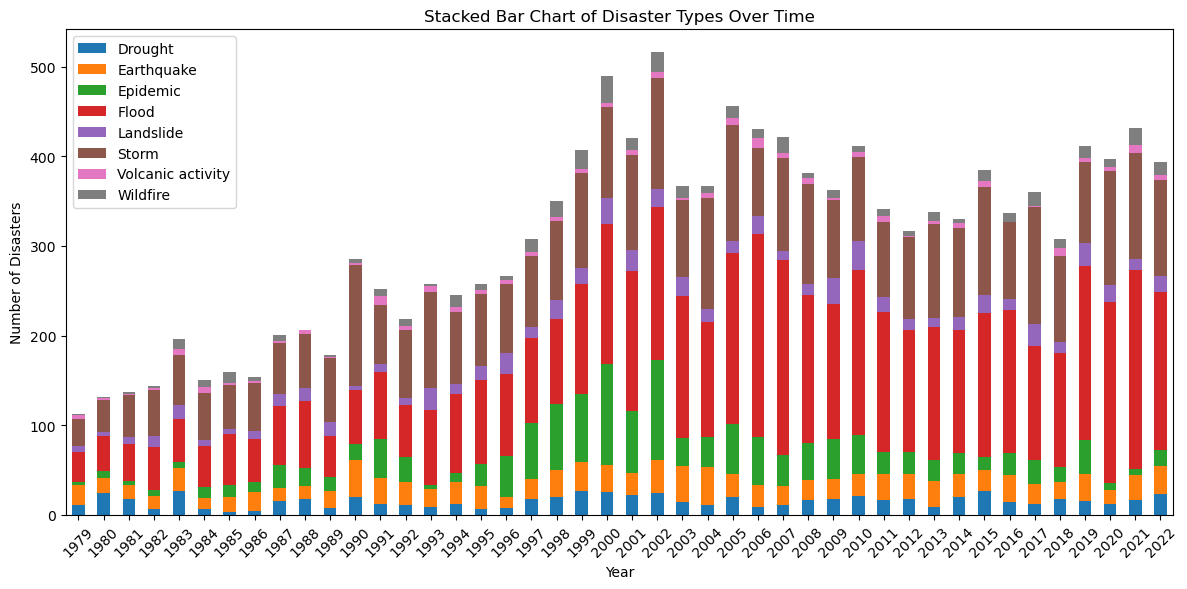

In [34]:
# Pivot the DataFrame to get disaster types as columns
stacked_disaster_df = merged_df.pivot(index='Year', columns='Disaster Type', values='Count').fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot the stacked bars
stacked_disaster_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Stacked Bar Chart of Disaster Types Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

#Save the plot
plt.savefig("Resources/stackedBarChart.png")

# Show the stacked bar chart
plt.tight_layout()
plt.show()

---
## 7.	Rank of countries rated ‘safest’ and ‘most at risk’ regarding to experiencing disasters

In [35]:
# Group the data by 'Country' and count the number of disasters in each country
country_disaster_counts = main_data_df['Country'].value_counts().reset_index()
country_disaster_counts.columns = ['Country', 'Disaster Count']

# Sort the countries by disaster counts in ascending order
sorted_countries = country_disaster_counts.sort_values(by='Disaster Count', ascending=True)

# Select the top 10 countries with the least disaster counts
top_10_least_disasters = sorted_countries.head(10)

# Display the result
top_10_least_disasters

Country  Disaster Count
100      DJ               1
83       CH               1
84       GU               1
85       RW               1
86       AE               1
87       NL               1
88       QA               1
89       HU               1
90       SY               1
99       TN               1

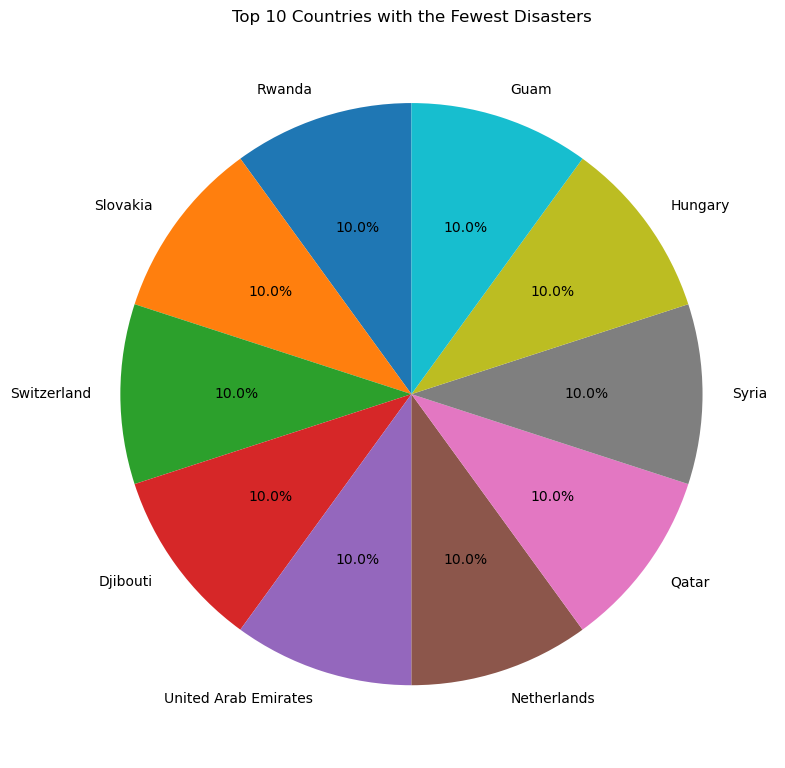

In [36]:
# Top 10 countries with least disaster numbers
data = {
    'Country': ['Rwanda', 'Slovakia', 'Switzerland', 'Djibouti', 'United Arab Emirates', 'Netherlands', 'Qatar', 'Syria', 'Hungary', 'Guam'],
    'Disaster Count': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Disaster Count'], labels=df['Country'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with the Fewest Disasters')

#Save the plot
plt.savefig("Resources/fewest_disasters_Pie.png")

# Show the pie chart
plt.tight_layout()
plt.show()

In [37]:
# Group the data by 'Country' and count the number of disasters in each country
disaster_counts_by_country = main_data_df['Country'].value_counts()

# Sort the counts in descending order and select the top 10 countries
top_10_countries_most_disasters = disaster_counts_by_country.head(10)

# Create a DataFrame from the top 10 countries and their disaster counts
top_10_disaster_countries_df = pd.DataFrame({
    'Country': top_10_countries_most_disasters.index,
    'Number of Disasters': top_10_countries_most_disasters.values
})

# Display the DataFrame
top_10_disaster_countries_df

Country  Number of Disasters
0      IN                  260
1      CN                  260
2      IR                  112
3      PH                   97
4      ID                   87
5      JP                   67
6      AF                   62
7      LK                   58
8      VN                   57
9      RU                   55

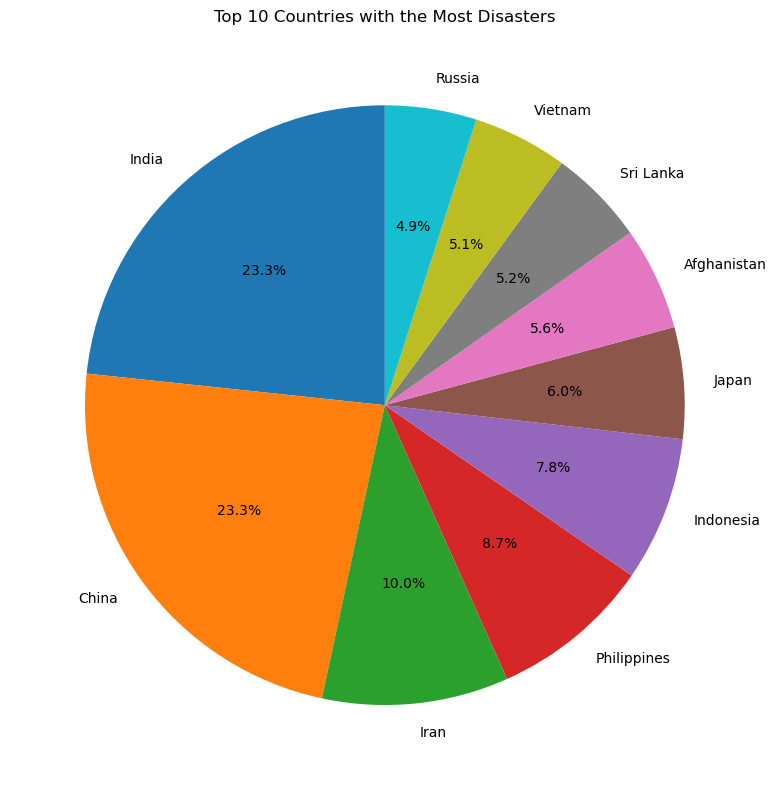

In [38]:
# Top 10 countries with the highest disaster numbers
data = {
    'Country': ['India', 'China', 'Iran', 'Philippines', 'Indonesia', 'Japan', 'Afghanistan', 'Sri Lanka', 'Vietnam', 'Russia'],
    'Number of Disasters': [260, 260, 112, 97, 87, 67, 62, 58, 57, 55]
}

# Create a DataFrame from the data
import pandas as pd
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Country'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with the Most Disasters')

#Save the plot
plt.savefig("Resources/most_disasters_Pie.png")

# Show the pie chart
plt.tight_layout()
plt.show()